<a href="https://colab.research.google.com/github/BABALEXA/Laboratorny/blob/main/lab5/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [1]:
!pip install datasets seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('/content/vgsales.csv')
df #чтение файла

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df_1 = df.drop(columns=['Rank','Name'])
df_1

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16593,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

In [5]:
df_1.corr()

<ipython-input-5-e6c3a4301a77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1.corr()


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [6]:
df_2 = df_1.drop(columns = ['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
df_2


,Platform,Genre,Publisher,Global_Sales
0,Wii,Sports,Nintendo,82.74
1,NES,Platform,Nintendo,40.24
2,Wii,Racing,Nintendo,35.82
3,Wii,Sports,Nintendo,33.00
4,GB,Role-Playing,Nintendo,31.37
...,...,...,...,...
16593,GBA,Platform,Kemco,0.01
16594,GC,Shooter,Infogrames,0.01
16595,PS2,Racing,Activision,0.01
16596,DS,Puzzle,7G//AMES,0.01


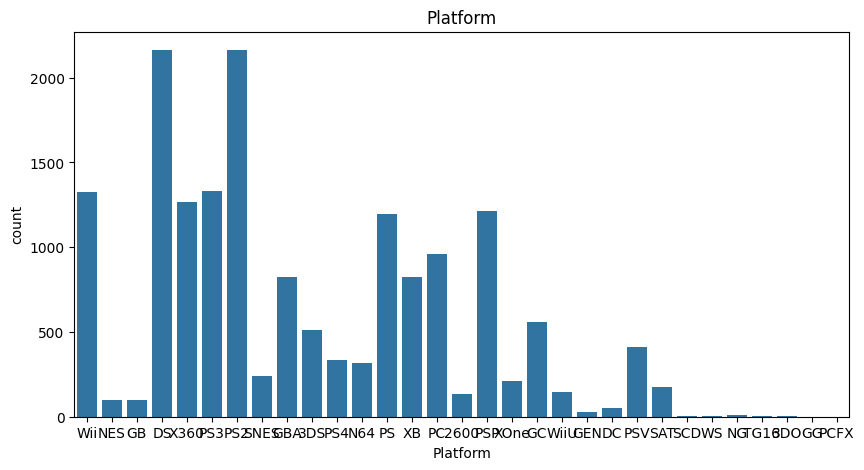

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_2, x='Platform')
plt.title('Platform')
plt.show()

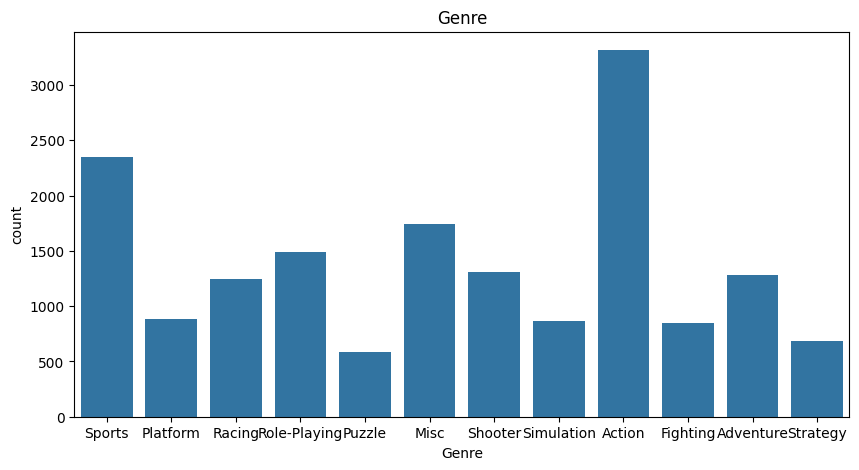

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_2, x='Genre')
plt.title('Genre')
plt.show()

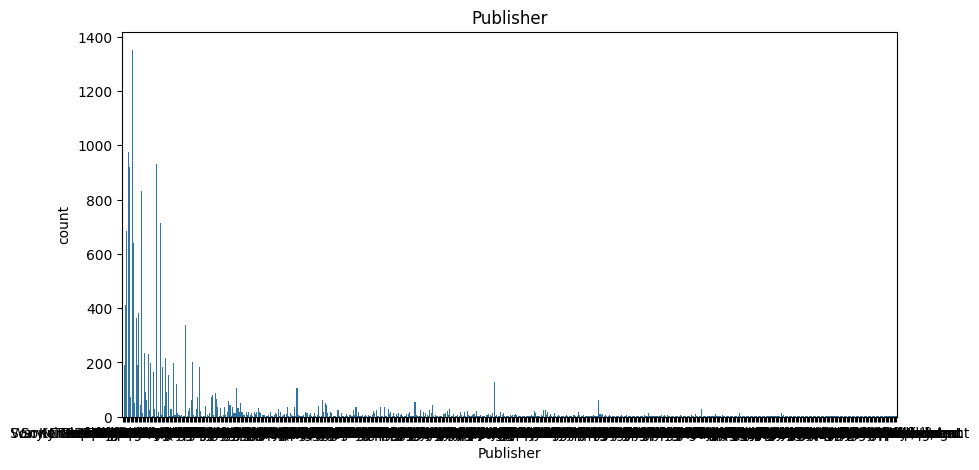

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_2, x='Publisher')
plt.title('Publisher')
plt.show()

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [10]:
X = df_2.drop(columns = 'Global_Sales')
X

,Platform,Genre,Publisher
0,Wii,Sports,Nintendo
1,NES,Platform,Nintendo
2,Wii,Racing,Nintendo
3,Wii,Sports,Nintendo
4,GB,Role-Playing,Nintendo
...,...,...,...
16593,GBA,Platform,Kemco
16594,GC,Shooter,Infogrames
16595,PS2,Racing,Activision
16596,DS,Puzzle,7G//AMES


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
pca = PCA(n_components = 1)
one = OneHotEncoder(categories = 'auto')
encoder_df = one.fit_transform(X['Publisher'].values.reshape(-1,1))
df_encod = pd.DataFrame(encoder_df.toarray())
pca_plis_work = pca.fit_transform(df_encod)
X['Publisher'] = pca_plis_work
X

,Platform,Genre,Publisher
0,Wii,Sports,-0.043423
1,NES,Platform,-0.043423
2,Wii,Racing,-0.043423
3,Wii,Sports,-0.043423
4,GB,Role-Playing,-0.043423
...,...,...,...
16593,GBA,Platform,-0.044107
16594,GC,Shooter,-0.045579
16595,PS2,Racing,-0.177456
16596,DS,Puzzle,-0.044634


In [15]:
odd = pd.get_dummies(X, columns = ['Platform','Genre'])
odd

,Publisher,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,-0.043423,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.043423,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-0.043423,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.043423,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.043423,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,-0.044107,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
16594,-0.045579,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
16595,-0.177456,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16596,-0.044634,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

Y = df_2['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(jopa, Y, test_size=0.2, random_state=42)

,Publisher,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,-0.095333,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.095333,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-0.095333,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.095333,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.095333,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,-0.044121,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
16594,-0.045594,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
16595,-0.177526,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16596,-0.043538,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

{'MAE': 0.5386849870321208, 'MSE': 1.8468028284192102, 'R2': 0.06332973654923924, 'mape (reverted - % верно угаданых)': -417.68637526886494, 'mape (original - % ошибок)': 517.6863752688649}
{'MAE': 346928756.3717522, 'MSE': 1.3319791482712103e+20, 'R2': -3.170349333545082e+19, 'mape (reverted - % верно угаданых)': -1349167384018.2078, 'mape (original - % ошибок)': 1349167384118.2078}
[3.22286407e-01 6.59517875e+11 1.04345237e+12 6.59517875e+11
 6.59517875e+11 6.59517875e+11 6.59517875e+11 6.59517875e+11
 6.59517875e+11 6.59517875e+11 6.59517875e+11 6.59517875e+11
 6.59517875e+11 6.59517875e+11 6.59517875e+11 6.59517875e+11
 6.59517875e+11 6.59517875e+11 6.59517875e+11 6.59517875e+11
 6.59517875e+11 6.59517875e+11 6.59517875e+11 6.59517875e+11
 6.59517875e+11 6.59517875e+11 6.59517875e+11 6.59517875e+11
 6.59517875e+11 6.59517875e+11 6.59517875e+11 6.59517875e+11
 2.05167105e+12 2.05167105e+12 2.05167105e+12 2.05167105e+12
 2.05167105e+12 2.05167105e+12 2.05167105e+12 2.05167105e+12
 2.

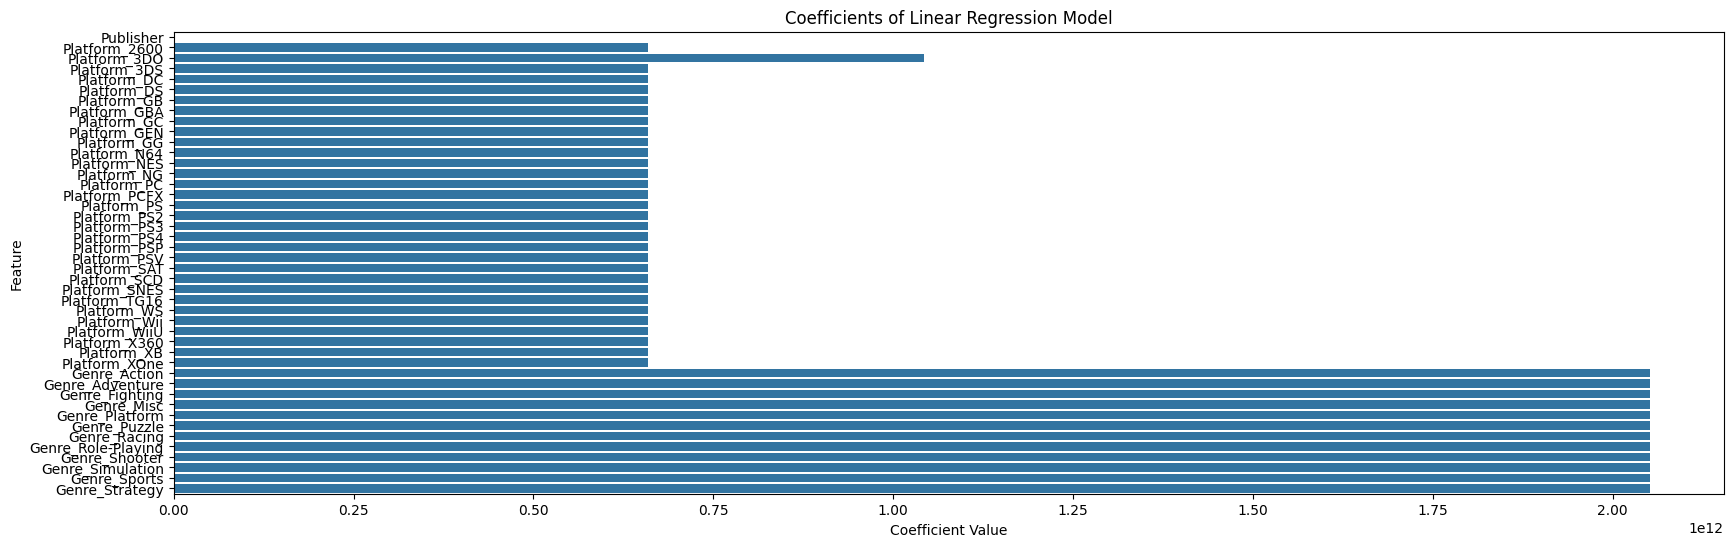

In [17]:
def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

print(compute_metrics(y_train, y_pred))

model = compute_regression(X_train, y_train) # Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

print(compute_metrics(y_test, y_pred))
coefficients = model.coef_
intercept = model.intercept_
print(coefficients)
# Названия признаков
# feature_names = jopa.columns().tolist()
jopa.columns
# Визуализация коэффициентов
plt.figure(figsize=(20, 6))
sns.barplot(x=coefficients, y=jopa.columns)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""